# __Finance 5330: Financial Econometrics__

## __Notes on Computing the Stack-and-Roll Hedge__

<br>
<br>

## Simulate Random Data for the Spot & Futures

In [1]:
import StatsKit
import StatsPlots

In [2]:
## Number of observations
N = 500


## Simulate spot prices as pure random walk
spot = cumsum(randn(N));

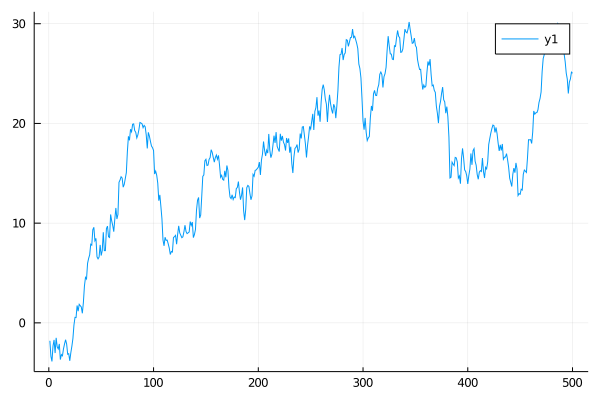

In [3]:
StatsPlots.plot(spot)

In [4]:
## Simulate the futures prices as a cointegrating relationship
α = 0.25
β = 2.46
σ = 2.0

z = randn(N) * σ
futures = α .+ β .* spot .+ z;

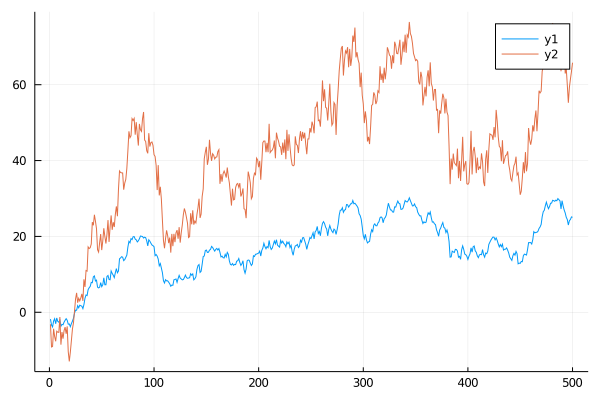

In [5]:
StatsPlots.plot!(futures)

In [10]:
ΔS = diff(spot);
ΔF = diff(futures);
X = ones(N-1,2)
X[:,2] .= ΔF
#y = ones(N-1,1)
#y .= ΔS
y = reshape(ΔS, (N-1,1));

In [7]:
coefs = StatsKit.MultivariateStats.llsq(X[1:60,:], ΔS[1:60]; bias=false)
coefs[2]

0.19147250187940734

In [8]:
M = 15
hedgeratios = zeros(M)
ibeg = 1
iend = 60
ii = 1
step = 30

for i=1:step:(step*M)
    coefs = StatsKit.MultivariateStats.llsq(X[ibeg:iend,:], ΔS[ibeg:iend]; bias=false)
    hedgeratios[ii] = coefs[2]
    ibeg += step
    iend += step
    ii += 1
end

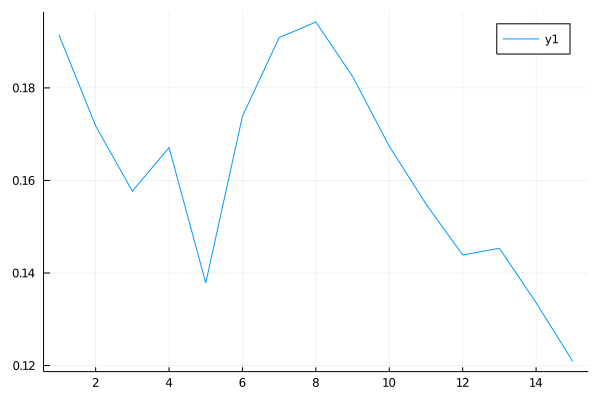

In [9]:
StatsPlots.plot(hedgeratios)